## Group3
### Members
1.Andrea Ulloa 
2.Ana Angulo (20171627)
3.Angela Coapaza (20171636) 

## An Inferencial Problem: The College-Educated Wage Gap

Using the data from the March Supplement of the U.S. Current Population Survey (2015) , in  this lab, we focus on the following inference question:

What is the difference in predicted wages between men and women with the same job-relevant characteristics? However, we only focus on the subset of college-educated workers.

To investigate the gender wage gap in this subset, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages*. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of men and women.

*The variables used to restrict the database (scl and clg) are no longer part of the W's controls anymore.

## 1. Data Analysis

We consider the same subsample of the U.S. Current Population Survey (2015). Let us load the data set.

In [1]:
using Pkg

#Pkg.add("DataFrames")
#Pkg.add("Dates")
#Pkg.add("CategoricalArrays")
#Pkg.add("RData")
#Pkg.add("Plots")
#Pkg.add("Pipe")
#Pkg.add("Distributions")
#Pkg.add("PlotlyJS")

using RData
using DataFrames
using Dates
using Statistics  #upload data of R format 
using CategoricalArrays # categorical data
using Plots
using Pipe
using StatsPlots
using Distributions
using PlotlyJS

LoadError: ArgumentError: Package Pipe not found in current path:
- Run `import Pkg; Pkg.add("Pipe")` to install the Pipe package.


In [2]:
#Pkg.build("GR")
#Pkg.build("Plots")

In [3]:
rdata_read = load("../../data/wage2015_subsample_inference.RData")
data = rdata_read["data"]
names(data)
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows and columns

Number of Rows : 5150
Number of Columns : 20


***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

As we mention before, we focus only on a subset of the data. For this porpouse, we use scl and clg variables.

In [4]:
#subset(data, :scl =>ByRow(==(1)), :clg =>ByRow(==(1)))
#data1= data[(data[:,"scl"].==1) .| (data[:,"clg"].==1),:] 
data = filter(row -> (row.scl == 1 || row.clg == 1) , data) 

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,8.65385,2.158,0.0,0.0,0.0,1.0,0.0,0.0,0.0


To start our (causal) analysis, we compare the sample means given gender:

In [5]:
Z = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_female = filter(row -> row.sex == 1, data)
Z_female = select(data_female,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_male = filter(row -> row.sex == 0, data)
Z_male = select(data_male,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )
means = DataFrame( variables = names(Z), All = describe(Z, :mean)[!,2], Men = describe(Z_male,:mean)[!,2], Female = describe(Z_female,:mean)[!,2])


,variables,All,Men,Female
,String,Float64,Float64,Float64
1,lwage,3.00002,3.03841,2.9569
2,sex,0.470991,0.0,1.0
3,shs,0.0,0.0,0.0
4,hsg,0.0,0.0,0.0
5,scl,0.466754,0.481824,0.449827
6,clg,0.533246,0.518176,0.550173
7,ad,0.0,0.0,0.0
8,ne,0.226532,0.219347,0.234602
9,mw,0.265971,0.261245,0.27128


In particular, the table above shows that the difference in average logwage between men and women is equal to $0,0815$. Also, we can notice that other education dimensions are zero since we have restricted the database to people with only college education. 

In [6]:
mean(Z_female[:,:lwage]) - mean(Z_male[:,:lwage])

-0.08150855508735955

In [7]:
x=0.08150855508735955 -0.03834473367441493 
x

0.043163821412944614

Thus, the unconditional gender wage gap is about $8,2$% for the group of never married workers (women get paid less on average in our sample). In comparison to the general data base, the gender-gap is bigger by $4.32$%

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in Julia.

In [25]:
#install all the package that we can need
#Pkg.add("Lathe")
#Pkg.add("GLM") # package to run models 
#Pkg.add("StatsPlots")
#Pkg.add("MLBase")
#Pkg.add("Tables")
#Pkg.add("CovarianceMatrices") # robust standar error 
#Pkg.add("Gadfly")
# Load the installed packages
using DataFrames, Statistics
using Tables
using CSV
using GLM
using CovarianceMatrices
using Gadfly

In [26]:
nocontrol_model = lm(@formula(lwage ~ sex), data)
nocontrol_est = GLM.coef(nocontrol_model)[2]
nocontrol_se = GLM.coeftable(nocontrol_model).cols[2][2]

nocontrol_se1 = stderror(HC1(), nocontrol_model)[2]
println("The estimated gender coefficient is ", nocontrol_est ," and the corresponding robust standard error is " ,nocontrol_se1)

The estimated gender coefficient is -0.08150855508736024 and the corresponding robust standard error is 0.019586032782704106


Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions. 
It's important to notice that we don't include the education controls since, as seen before, the values related to "shs","hsg","ad" are all $0$.

Let us run the ols regression with controls.

## Ols regression with controls

In [27]:
flex = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4) * (clg+occ2+ind2+mw+so+we))
control_model = lm(flex , data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + exp2 + exp3 + exp4 + clg + occ2 + ind2 + mw + so + we + exp1 & clg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & clg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & clg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & clg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error       t  Pr(>|t|)     Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       3.43576        0.520879     6.60    <1e-10    2.41442       4.45709
sex              -0.0530623      0.0193532   -2.74    0.0061   -

In [28]:
control_est = GLM.coef(control_model)[2]
control_se = GLM.coeftable(control_model).cols[2][2]
control_se1 = stderror( HC0(), control_model)[2]
println("Coefficient for OLS with controls " , control_est)

Coefficient for OLS with controls -0.053062340359544075


The estimated regression coefficient $\beta_1\approx-0.053$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $8.1$\% for women decreases to about $5.3$\% after controlling for worker characteristics of the subset of college-educated workers.


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

## Partialling-Out using ols

In [29]:
# models
# model for Y
flex_y = @formula(lwage ~ (exp1+exp2+exp3+exp4) * (clg+occ2+ind2+mw+so+we))
flex_d = @formula(sex ~ (exp1+exp2+exp3+exp4) * (clg+occ2+ind2+mw+so+we))

# partialling-out the linear effect of W from Y
t_Y = residuals(lm(flex_y, data))

# partialling-out the linear effect of W from D
t_D = residuals(lm(flex_d, data))

data_res = DataFrame(t_Y = t_Y, t_D = t_D )
# regression of Y on D after partialling-out the effect of W

partial_fit = lm(@formula(t_Y ~ t_D), data_res)

partial_est = GLM.coef(partial_fit)[2]

# standard error
partial_se = GLM.coeftable(partial_fit).cols[2][2]

partial_se1 = stderror( HC0(), partial_fit)[2]

#condifence interval
GLM.confint(partial_fit)[2,:]

2-element Vector{Float64}:
 -0.08957069899693045
 -0.016553981718576943

In [30]:
println("Coefficient for D via partiallig-out ", partial_est, " robust standard error:", control_se1 )

Coefficient for D via partiallig-out -0.053062340357753694 robust standard error:NaN


Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 


## Summarize the results

In [31]:
DataFrame(modelos = [ "Without controls", "full reg", "partial reg" ], 
Estimate = [nocontrol_est,control_est, partial_est], 
StdError = [nocontrol_se1,control_se1, partial_se1])

,modelos,Estimate,StdError
,String,Float64,Float64
1,Without controls,-0.0815086,0.019586
2,full reg,-0.0530623,NaN
3,partial reg,-0.0530623,0.0183528


It it worth to notice that controlling for worker characteristics increases the gender wage gap from 8\% to 5\%. The controls we used in our analysis include 2 educational attainment indicators (some college and college graduate), 4 region indicators (midwest, south, west, and northeast);  a quartic term (first, second, third, and fourth power) in experience and 22 occupation and 23 industry indicators.

Keep in mind that the predictive effect (PE) does not only measures discrimination (causal effect of being female), it also may reflect
selection effects of unobserved differences in covariates between men and women in our sample.

# 2. Graphs: Description of main variables 

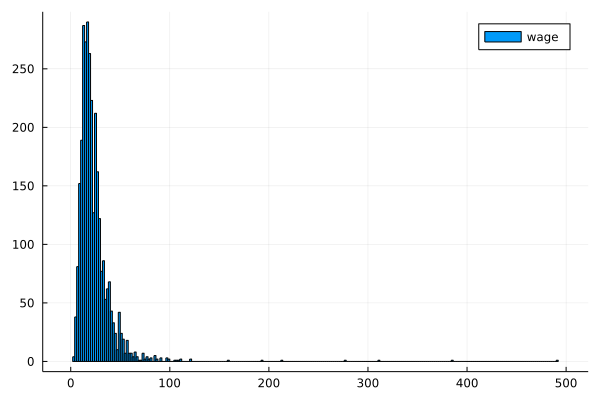

In [32]:
gr()
histogram(data.wage, label = "wage")

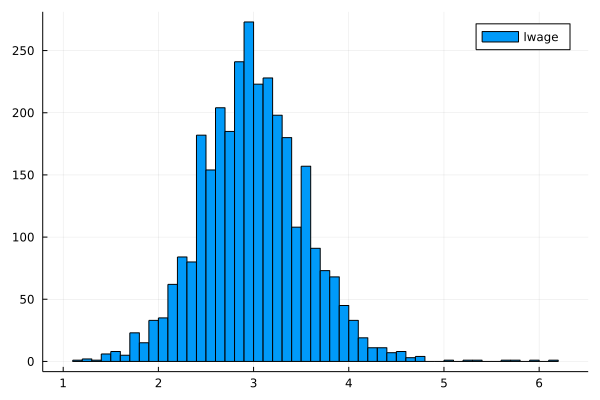

In [33]:
gr()
histogram(data.lwage, label = "lwage")


In [34]:
using PlotlyJS, CSV, DataFrames
df = dataset(data, "clg")
plot(df, x=:sex, y=:total_bill, color=:time, kind="bar")

LoadError: MethodError: no method matching dataset(::DataFrame, ::String)
[0mClosest candidates are:
[0m  dataset([91m::Type{CSV.File}[39m, ::String) at C:\Users\Roberto\.julia\packages\PlotlyJS\4jzLr\src\PlotlyJS.jl:155
[0m  dataset([91m::Type{DataFrame}[39m, ::String) at C:\Users\Roberto\.julia\packages\PlotlyJS\4jzLr\src\PlotlyJS.jl:163

# Graph: Experience profile and log-wage

The task is to replicate the Figure 11.10 from Lemieux (2006) considering that "you will have only two plotted lines for this college-educated workers". It means we have to plot using the subset of the original data.

In [35]:
#First step: Estimation for quadratic and quartic approaches

quartic   = @formula(lwage ~  exp1+exp2+exp3+exp4)
quadratic = @formula(lwage ~  exp1+exp2)

# quartic
quartic_pred = predict(lm(quartic, data))

# quadratic
quadratic_pred = predict(lm(quadratic, data))

#lwage_quartic = quartic_pred
#lwage_quadratic = quadratic_pred
    
# adding predictions
data[!,:quartic_pred]=quartic_pred
data[!,:quadratic_pred]=quadratic_pred
data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,8.65385,2.158,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
#Second step: cleaning data to plot
graph_2 = data[:, ["exp1", "clg"]] #"lwage", "lwage_quartic","lwage_quadratic"]]
#graph_0= mean(data[:,"lwage"]), mean(data[:,"quartic_pred"])
names(graph_2)

2-element Vector{String}:
 "exp1"
 "clg"

In [37]:
data_0=data[:, "lwage", "lwage_quartic","lwage_quadratic"]
graph_0 = mean(eachcol(data_0))

LoadError: MethodError: no method matching getindex(::DataFrame, ::Colon, ::String, ::String, ::String)
[0mClosest candidates are:
[0m  getindex(::DataFrame, ::Colon, ::Union{AbstractString, Signed, Symbol, Unsigned}) at C:\Users\Roberto\.julia\packages\DataFrames\6xBiG\src\dataframe\dataframe.jl:510
[0m  getindex(::DataFrame, ::Colon, [91m::Union{Colon, Regex, AbstractVector, All, Between, Cols, InvertedIndex}[39m) at C:\Users\Roberto\.julia\packages\DataFrames\6xBiG\src\dataframe\dataframe.jl:594
[0m  getindex(::DataFrame, [91m::typeof(!)[39m, ::Union{AbstractString, Symbol}) at C:\Users\Roberto\.julia\packages\DataFrames\6xBiG\src\dataframe\dataframe.jl:524
[0m  ...

# Graph: Interval confidence of sex's coefficient for all different models

In [38]:
function coefplot(m)
        DF  = DataFrame(x=coefnames(m),y=coef(m), mins=confint(m)[:,1], maxs=confint(m)[:,2])[2:end,:] #no intercept,
        Gadfly.plot(DF, x=:x, y=:y, ymin=:mins, ymax=:maxs,
        Geom.point, Geom.errorbar,
        Guide.xlabel(""),
        Guide.ylabel("")
        )
end

coefplot (generic function with 1 method)

## Basic Model

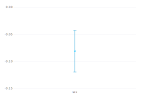

In [39]:
coefplot(nocontrol_model)

## Control model

In [40]:
coefplot(control_model)

## Partialling out model

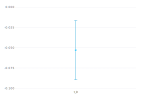

In [41]:
coefplot(partial_fit)

## Question 5: Proof of the Frisch - Waugh - Lovell Theorem

For the proof of the theorem, we use the following:

The Partialling-out operation

Be the following equation:  𝑉  =  𝛽  𝑊  + e

𝑉̃   =  𝑉  -  𝛼𝑌𝑊  𝑊 
𝛼𝑌𝑊  is the  𝛽̂   (estimated parameter of the regression of V with W)

We're creating a "residual" V by subtracting the part of V that is linearly predicted

This property tells us that from a linear combination of the sum of two vectors it follows that there is a linear combination of the residualized vectors.

𝑌  =  𝑉  +  𝑊   ⟶   𝑌̃   =  𝑉̃   +  𝑊̃  

Then let be the following regression:

𝑌=𝑇𝛽1+𝑋𝛽2+𝑒
 
where,

𝑇 : treatment variable

𝛽1 : parameter that captures the causal effect

𝑋 : other regressors

𝑒 : error

Since we are interested in knowing only the value of  𝛽1 , we partialling-out to both sides of our regression equation:

𝑌̃ =𝑇̃ 𝛽1+𝑋̃ 𝛽2+𝑒̃ 
 
Since the regression is a linear combination, we can obtain a linear equation of the errors estimated by the property defined at the beginning.

Each argument of the equation [2] is the estimated error of the regression of that variable with respect to  𝑋 

𝑌̃   =  𝑌  -  𝛼𝑌𝑋  𝑋 
𝑇̃   =  𝑇  -  𝛼𝑌𝑋  𝑋 
𝑋̃   =  𝑋  -  𝛼𝑋𝑋  𝑋 
𝑒̃   =  𝑒  -  𝛼𝑒𝑋  𝑋 
Some of these estimated error will be deleted because:

𝛼𝑋𝑋  =  𝐼 . So,  𝑋̃   = 0

By definition:  𝐸(𝑒|𝑋)  = 0,  𝛼𝑒𝑋 = 0, and  𝑒̃  = 𝑒 
So the equation [2] reduces to the equation [3]:
𝑌̃ =𝑇̃ 𝛽1+𝑒
 
Finally we come to what F-W-L proves in their theorem: we can reduce the equation [1] containing many regressors on  𝑋  to a simple residual regression (which is defined by partially removing the linear effect of  𝑋  from  𝑌  and  𝑇 ) that only has the parameter that we are interested in estimating.

The estimated parameter  𝛽1  of the equation [1] will be equal to the parameter  𝛽1  that will be estimated in the regression [3].